# **DEEP LEARNING**

Name: **FEED FORWARD NEURAL NETWORK**  
Date : 2023  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pnd
import itertools
from ipywidgets import interact, interactive, fixed, interact_manual
from prettytable import PrettyTable
import ipywidgets as widgets

## **1: MCCULLOCH-PITTSS NEURON**

$$
y = \left\{
    \begin{array}{ll}
        1 & if \sum^n_{i=1} x_i \geq b \\
        0 & \mbox{otherwise.}
    \end{array}
\right.
$$

**$$x_i = 0 \text{ or } 1$$**

In [ ]:
def MachCullochPitts(X,threshold):
  decision = None
  sum = 0
  n= len(X)

  for i in range(0,n):
    sum += X[i]

  if (sum >= threshold):
    decision = 1
  else:
    decision = 0
  
  return decision

### And logic function

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

It's true if **A and B** are true
> It's lineary separable

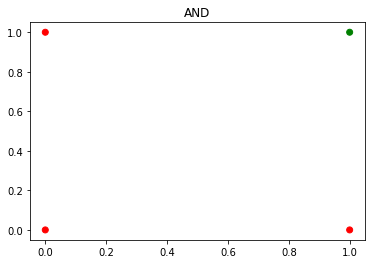

In [ ]:
AND = [0,0,0,1]
colorPoint = []
for d in AND:
  if d==1:
    colorPoint.append("g")
  else:
    colorPoint.append("r")
plt.scatter(X[:,0],X[:,1],c=colorPoint)
plt.title("AND")
plt.show()

In [ ]:
print("-> AND ")
threshold = 2 #1 and 1 = 1+1 = 2
for o in X:
  print(o,MachCullochPitts(o,threshold))


-> AND 
[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


### Or logic function

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

It's true if **A or B** are true
> It's lineary separable

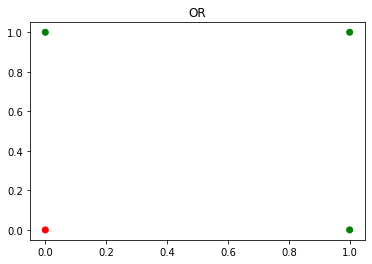

In [ ]:
OR = [0,1,1,1]
colorPoint = []
for d in OR:
  if d==1:
    colorPoint.append("g")
  else:
    colorPoint.append("r")
plt.scatter(X[:,0],X[:,1],c=colorPoint)
plt.title("OR")
plt.show()

In [ ]:
print("-> OR ")
threshold = 1 #1 or 1 = 1
for o in X:
  print(o,MachCullochPitts(o,threshold))

-> OR 
[0 0] 0
[0 1] 1
[1 0] 1
[1 1] 1


### Xor logic function

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

- Return true if **A or B** are true  
- Return false if **A and B** are true


> **It's not linearly separable**

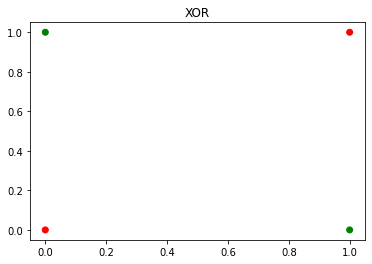

In [ ]:
XOR = [0,1,1,0]
colorPoint = []
for d in XOR:
  if d==1:
    colorPoint.append("g")
  else:
    colorPoint.append("r")
plt.scatter(X[:,0],X[:,1],c=colorPoint)
plt.title("XOR")
plt.show()

##**2: PERCEPTRON**

###The model

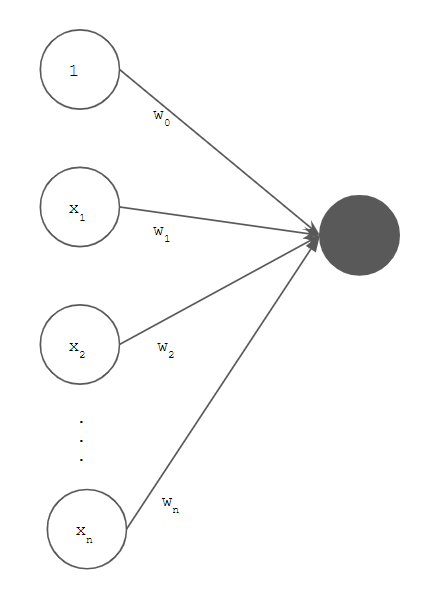

**Linear combination** 
$$o(\vec{x}) = w_0 + \sum^n_{i=1}w_ix_i$$

$$ w_0  \text{ is the weight of the bias} $$

$$x \in \mathbb{R}$$

**Activation function**
$$f(\vec{x}) = a(o(\vec{x}))$$

### The hinge loss function

$$Loss : \{-1,1\} \times \mathbb{R} \rightarrow \mathbb{R}$$

$$\sum^n_{i=1}max(0,1-y_{true}^i\times f(\vec{x}^i))$$

In our case :

$$f(\vec{x}) = o(\vec{x}) = 1 * w_0 + \sum^n_{i=1}w_ix_i$$

**In the case of a binary classification, -1 is the negative class and 1 is the positive class.**



#### Understanding the Hinge Error Loss

$$max(0,1-y_{true}f(\vec{x}))$$


$$
\mathcal{L}(x,y,f(x)) = \left\{
    \begin{array}{ll}
        0 & \text{if }  y_{true}\times f(\vec{x}) \geq 1 \\
        1-y^i_{true} \times f(\vec{x}^i) & \mbox{otherwise}
    \end{array}
\right.
$$

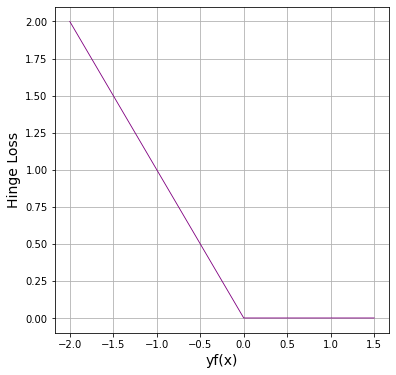

In [ ]:
y_true = 1

#Simulation of f(x) in range
f_x = np.arange(-2,2,step=0.5)

YFx = []  #x axis = y_true * f(x)
HL = []   #y axis = Hinge loss
for value in f_x:
  YFx.append(y_true*value)
  HL.append(max(0,1-y_true*value))

plt.figure(figsize=(6, 6))
plt.plot(YFx,HL,color="purple",linewidth=0.85)
plt.grid()
plt.xlabel('', fontsize=14)
plt.ylabel('Hinge Loss', fontsize=14)
plt.xlabel('yf(x)', fontsize=14)
plt.show()

In [ ]:
X=PrettyTable()
X.field_names = ["y","fx","yfx","Loss","Hinge Loss"]
for i in range (0,len(YFx)):
  c = ""
  if YFx[i] >= 1 :
    c = "y_true * f(x) >= 1 -> 0 (No error)"
  
  X.add_row([y_true,f_x[i],YFx[i],HL[i],c])
print(X)

+---+------+------+------+------------------------------------+
| y |  fx  | yfx  | Loss |             Hinge Loss             |
+---+------+------+------+------------------------------------+
| 1 | -2.0 | -2.0 | 2.0  |                                    |
| 1 | -1.5 | -1.5 | 1.5  |                                    |
| 1 | -1.0 | -1.0 | 1.0  |                                    |
| 1 | -0.5 | -0.5 | 0.5  |                                    |
| 1 | 0.0  | 0.0  |  0   |                                    |
| 1 | 0.5  | 0.5  |  0   |                                    |
| 1 | 1.0  | 1.0  |  0   | y_true * f(x) >= 1 -> 0 (No error) |
| 1 | 1.5  | 1.5  |  0   | y_true * f(x) >= 1 -> 0 (No error) |
+---+------+------+------+------------------------------------+


if y and f(x) are signed values (+1,−1) :

- The loss is 0, if $y∗f(x)$ are positive, respective both values have the same sign.
- The loss is $1−y∗f(x)$ if $y∗f(x)$ is negative

**The sample $x_i$ is misclassified, if $y_i⟨x_i,w⟩≤0$**


#### Objective function and update of weights

The objective is to minimise $1-y^i_{true}f(\vec{x}^i)$
$$1-y^i_{true}f(\vec{x}^i) =  -y^i_{true}f(\vec{x}^i) = -y_{true}^i(w_0 + \sum^n_{j=1}x_jw_j)$$

Derivative

$$
\frac{\partial{L}}{\partial{w}} = -y^i_{true} \times x^i \times 1
$$
$$
\frac{\partial{L}}{\partial{w}} = -y^i_{true} \times x_i
$$

Update weights

$$
w_j = \left\{
    \begin{array}{ll}
        0 & \text{if }  y_{true}^i\times f(\vec{x}^i) > 0 \\
        w_j - \alpha \times -y_{true}^i\times x^i_j & \mbox{otherwise}
    \end{array}
\right.
$$

$$\alpha \text{ is the learning rate} $$

#### Example

$$\alpha = 0.01$$
$$x = 1$$
$$y_{true} = 1$$
$$w = -0.5$$

**Iteration 1**  
$prediction = y_{true} \times (x \times w)$  
$prediction = 1 \times (1 \times -0.5)$  
$prediction = -0.5$   
$prediction < 0$  

Update of the weights 
$\mbox{New weight} = w - \alpha \times - y_{true} \times x$  
$\mbox{New weight} = -0.5 - 0.01 \times - 1 \times 1$  
$\mbox{New weight} = -0.49$    

**Iteration 2**  
$prediction = y_{true} \times (x \times w)$  
$prediction = 1 \times (1 \times -0.49)$  
$prediction = -0.49$   
The error is less important. 

In [ ]:
lr = 0.01
w= -0.5
y_true = 1

#Set x = 1
x= 1

print("--- ITERATION 1 ----")
print("y_true * (x*w)")

prediction = y_true * (x*w)
print("Prediction : ",prediction)
nw = w - lr * -y_true *x
print("New w : ",nw)
w = nw

print("--- ITERATION 2 ----")
prediction = y_true * (x*w)
print("Prediction : ",prediction)


--- ITERATION 1 ----
y_true * (x*w)
Prediction :  -0.5
New w :  -0.49
--- ITERATION 2 ----
Prediction :  -0.49


### An example

#### Dataset

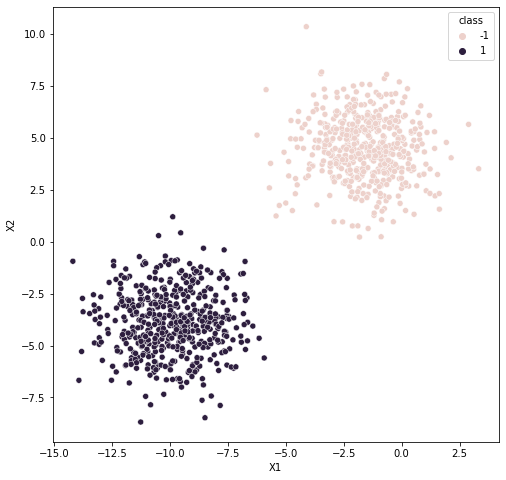

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=1.5)
y = [-1 if val==0 else val for val in y]

X_df = pnd.DataFrame(X, columns=['x1','x2'])
y_df = pnd.DataFrame(y, columns=["class"])

dataset = pnd.concat([X_df, y_df], axis=1)

plt.figure(figsize=(8, 8))
ax = plt.axes()
sns.scatterplot(x=X[:,0], y=X[:,1], hue='class', data=dataset)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

#### The perceptron 

In [ ]:
class PerceptronByHand():

  def __init__(self):
    self.weights = None
    self.hingeLoss = []
    self.historyWeights = []
  

  def fit(self,x_train,y_train,epochs,lr):

    #Adding bias
    X = []
    for obs in x_train:
      row=[]
      row.append(1)
      for i in range(0,len(obs)):
        row.append(obs[i])
      X.append(row)
   
    #Weight initialisation
    self.weights = np.zeros(len(X[0]))


    #Learning phase
    for e in range(0,epochs):

      errorEpoch = 0
      for v in range(0,len(X)):
        vect_x = X[v]
        y_true = y_train[v]

        #Linear combination
        LinearCombination = 0
        for i in range(0,len(vect_x)):
          LinearCombination += vect_x[i]*self.weights[i]

        #Error
        error = False
        if (y_true * LinearCombination >0):
            error = False
            errorEpoch += 0
        else:
            error = True
            errorEpoch += y_true * LinearCombination
            for k in range(0,len(self.weights)):
              self.weights[k] = self.weights[k] + lr * y_true*vect_x[k]
    
      self.historyWeights.append([self.weights[0],self.weights[1],self.weights[2]])
      self.hingeLoss.append(errorEpoch*-1)
      
      


In [ ]:
perceptron = PerceptronByHand()
perceptron.fit(X,y,10,0.01)


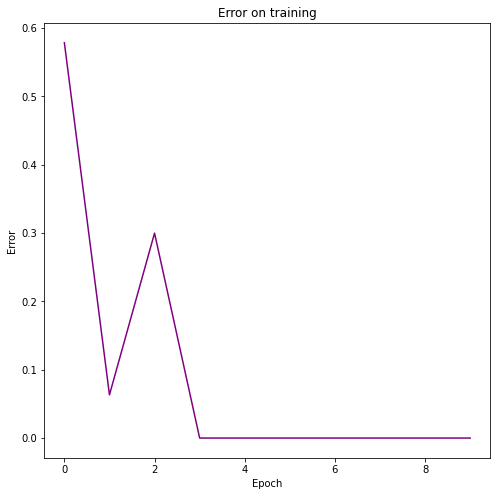

In [ ]:
plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.plot(perceptron.hingeLoss, color="purple")
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
plt.title("Error on training")
plt.show()

In [ ]:
print("W0 : ",perceptron.weights[0])
print("W1 : ",perceptron.weights[1])
print("W2 : ",perceptron.weights[2]) 

W0 :  -0.060000000000000005
W1 :  -0.042151621352991026
W2 :  -0.1794965702720291


#### The hyperplan

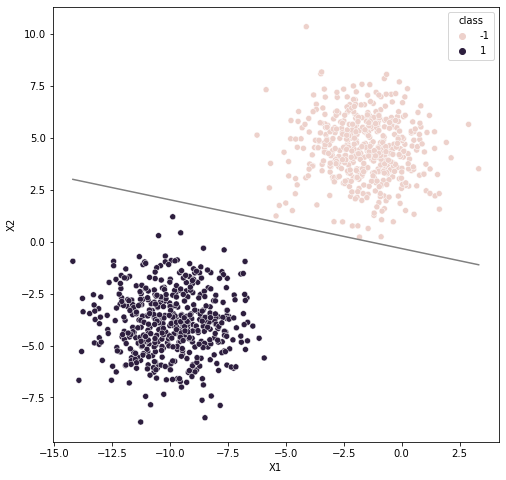

In [ ]:
def hyperplanEquation(w0,w1,w2):
  beta1=0
  beta0=0
  xA = 0
  yA =  -w0/w2
  xB = -w0/w1
  yB = 0
  beta1 = (yB-yA) / (xB-xA)
  beta0 = yA - (beta1*xA)
  return beta1,beta0

beta1, beta0 = hyperplanEquation(perceptron.weights[0],perceptron.weights[1],perceptron.weights[2])

x1min, x1max = X[:,0].min(), X[:,0].max()
valuesX = np.linspace(x1min, x1max)

#Calcul des Y à l'aide de l'équation de l'hyperplan
valuesY = beta1 * valuesX + beta0


plt.figure(figsize=(8, 8))
ax = plt.axes()
sns.scatterplot(x=X[:,0], y=X[:,1], hue='class', data=dataset)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.plot(valuesX, valuesY, 'k-', color="gray")
plt.show()

#### View the learning

In [ ]:
@interact(epoch=(0,len(perceptron.historyWeights)-1,1))
def displayLearning(epoch):

  weights = perceptron.historyWeights[epoch]
  w0 = weights[0]
  w1 = weights[1]
  w2 = weights[2]
  beta1, beta0 = hyperplanEquation(w0,w1,w2)
  x1min, x1max = X[:,0].min(), X[:,0].max()
  valuesX = np.linspace(x1min, x1max)
  valuesY = beta1 * valuesX + beta0
  plt.figure(figsize=(8, 8))
  ax = plt.axes()
  sns.scatterplot(x=X[:,0], y=X[:,1], hue='class', data=dataset)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  plt.plot(valuesX, valuesY, 'k-', color="gray")
  plt.show()



interactive(children=(IntSlider(value=4, description='epoch', max=9), Output()), _dom_classes=('widget-interac…

#### Using SkLearn

In [ ]:
from sklearn.linear_model import Perceptron
perceptronSKL = Perceptron(max_iter=100,eta0=0.01)
perceptronSKL.fit(X, y)

print("W0 : ",perceptronSKL.intercept_[0])
print("W1 : ",perceptronSKL.coef_[0][0])
print("W2 : ",perceptronSKL.coef_[0][1])



W0 :  -0.07
W1 :  -0.043065858346116925
W2 :  -0.2058709010462909


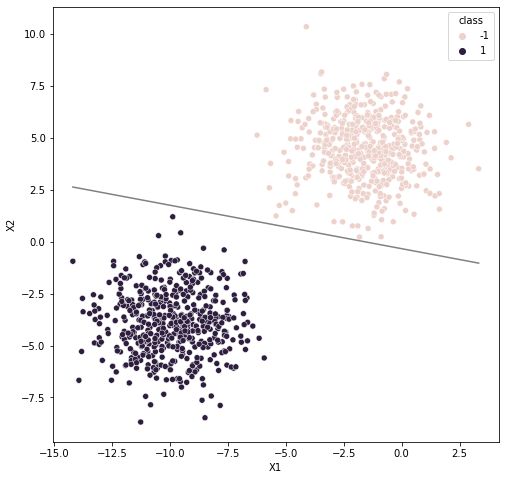

In [ ]:
beta1, beta0 = hyperplanEquation(perceptronSKL.intercept_[0],perceptronSKL.coef_[0][0],perceptronSKL.coef_[0][1])

x1min, x1max = X[:,0].min(), X[:,0].max()
valuesX = np.linspace(x1min, x1max)

#Calcul des Y à l'aide de l'équation de l'hyperplan
valuesY = beta1 * valuesX + beta0


plt.figure(figsize=(8, 8))
ax = plt.axes()
sns.scatterplot(x=X[:,0], y=X[:,1], hue='class', data=dataset)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.plot(valuesX, valuesY, 'k-', color="gray")
plt.show()

##3: MULTILAYER PERCEPTRON

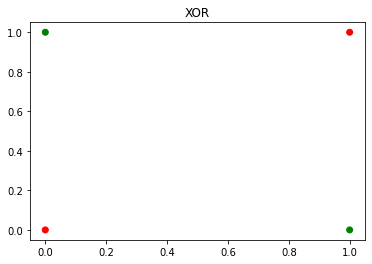

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

XOR = [0,1,1,0]
colorPoint = []
for d in XOR:
  if d==1:
    colorPoint.append("g")
  else:
    colorPoint.append("r")
plt.scatter(X[:,0],X[:,1],c=colorPoint)
plt.title("XOR")
plt.show()

In [ ]:

#Input
b=1
x1 = 0
x2 = 0
xOr = 0

#Layer 1
Neuron_0 = 1
Neuron_1 = (b*-0.5+x1*1+x2*-1)>0
if (Neuron_1 <=0 ):
  Neuron_1 = 0
else:
  Neuron_1 = 1


Neuron_2 = b*-0.5+x1*-1+x2*1
if (Neuron_2 <=0 ):
  Neuron_2 = 0
else:
  Neuron_2 = 1

print("N1 : ",Neuron_1)
print("N2 : ",Neuron_2)

#Layer 2
Output = Neuron_0*-0.5 + Neuron_1*1 + Neuron_2*1
if (Output <=0 ):
  Output = 0
else:
  Output = 1

print(" - - PREDICTION - - ")
X=PrettyTable()
X.field_names=(["X1","X2","XOR","OUTPUT"])
X.add_row([x1,x2,xOr,Output])
print(X)

N1 :  0
N2 :  0
 - - PREDICTION - - 
+----+----+-----+--------+
| X1 | X2 | XOR | OUTPUT |
+----+----+-----+--------+
| 0  | 0  |  0  |   0    |
+----+----+-----+--------+
